#Freecodecamp Machine Learning Python Project
Multiple Linear Regression with Neural networks

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-08-11 16:29:02--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.008s  

2023-08-11 16:29:03 (6.10 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
dataset["sex"]=(dataset["sex"]=="male").astype(int) #Convert the sex column to integers, so that female and male will be in values of 0 and 1

In [ ]:
dataset["smoker"]=(dataset["smoker"]=="no").astype(int) #Convert the smoker column to integers, so that yes and no will be in values of 0 and 1

In [ ]:
dataset['region'].replace(['northeast','northwest','southeast','southwest'], #Similar to what was done above, but in this case we use replace method to replace the regions with different integer values
                        [0,1,2,3], inplace=True)

In [ ]:
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,1,31.0,3,1,1,10600.55
1334,18,0,31.9,0,1,0,2205.98
1335,18,0,36.9,0,1,2,1629.83
1336,21,0,25.8,0,1,3,2007.95
1337,61,0,29.1,0,0,1,29141.36


In [ ]:
features=["age","sex","bmi","children","smoker","region"] #Creating a list containing the name of all the feature columns

In [ ]:
from sklearn.model_selection import train_test_split
X=dataset[features]
y= dataset["expenses"]
train_dataset,test_dataset,train_labels, test_labels= train_test_split(X,y,random_state=66,test_size=0.2) #Splitting the data into train and test datasets using the method we imported above,random_state=66 indicates that we want to have the same split every time we run this line of code.

In [ ]:
train_dataset.shape[1]

6

In [ ]:
from sklearn.preprocessing import StandardScaler #Import StandardScaler to Standardize the dataset
scaler=StandardScaler().fit(train_dataset) #Using StandarScaler to fit and  later transform the dataset
train_dataset=scaler.transform(train_dataset)
test_dataset=scaler.transform(test_dataset)

In [ ]:
#Building the model
from tensorflow.keras import models

model=models.Sequential()
model.add(layers.Dense(64,activation="relu",input_shape=(train_dataset.shape[1],))),
model.add(layers.Dense(64,activation="relu")),
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(1,activation="linear"))
model.compile(loss="mean_squared_error",optimizer="adam",metrics= ["mean_absolute_error","mean_squared_error"])

In [ ]:
history=model.fit(train_dataset,train_labels,epochs=100,batch_size=32,validation_data=(test_dataset,test_labels)) #Training the model

Epoch 1/100
34/34 [==============================] - 2s 11ms/step - loss: 326801920.0000 - mean_absolute_error: 13464.6387 - mean_squared_error: 326801920.0000 - val_loss: 305659200.0000 - val_mean_absolute_error: 12481.0205 - val_mean_squared_error: 305659200.0000
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 326215136.0000 - mean_absolute_error: 13445.9795 - mean_squared_error: 326215136.0000 - val_loss: 304402112.0000 - val_mean_absolute_error: 12438.0820 - val_mean_squared_error: 304402112.0000
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 323096736.0000 - mean_absolute_error: 13346.8613 - mean_squared_error: 323096736.0000 - val_loss: 298770528.0000 - val_mean_absolute_error: 12256.6875 - val_mean_squared_error: 298770528.0000
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 312041408.0000 - mean_absolute_error: 13013.0166 - mean_squared_error: 312041408.0000 - val_loss: 282200352.0000 - val_mean_absolut

9/9 - 0s - loss: 26203078.0000 - mean_absolute_error: 3149.5442 - mean_squared_error: 26203078.0000 - 57ms/epoch - 6ms/step
Testing set Mean Abs Error: 3149.54 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


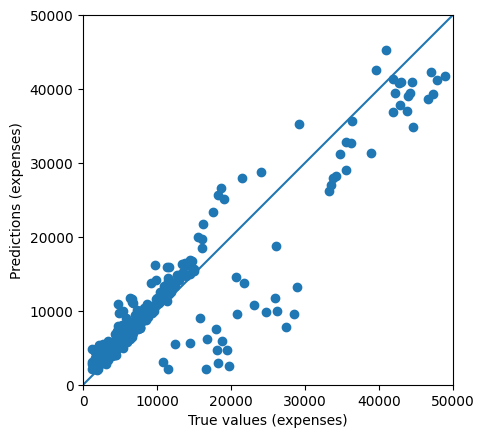

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)